# EDA FINAL DE CONTAMINACION  ATMOSFÉRICA y SONORA 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Contaminación Atmosférica

In [2]:
aire = pd.read_csv('../clean_data/air_quality_clean.csv')

In [3]:
aire

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Data Value,year,month
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,0.3,2015,1
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,1.2,2015,1
2,178540,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,209.0,Bensonhurst - Bay Ridge,8.6,2011,12
3,178561,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,8.0,2011,12
4,823217,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,409.0,Southeast Queens,6.1,2022,6
...,...,...,...,...,...,...,...,...,...,...,...
17040,816731,643,Annual vehicle miles traveled,Million miles,per square mile,CD,318.0,Flatlands and Canarsie (CD18),44.4,2019,1
17041,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),12.9,2019,1
17042,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),14.7,2010,1
17043,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,43.4,2010,1


### Comprobamos Nulos

In [4]:
aire.isnull().sum()

Unique ID         0
Indicator ID      0
Name              0
Measure           0
Measure Info      0
Geo Type Name     0
Geo Join ID       0
Geo Place Name    0
Data Value        0
year              0
month             0
dtype: int64

### Comprobamos Duplicados

In [5]:
aire[aire.duplicated(keep=False)]

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Data Value,year,month


In [6]:
aire.describe()

,Unique ID,Indicator ID,Data Value,year,month
count,17045.000000,17045.000000,17045.000000,17045.000000,17045.000000
mean,423222.646583,422.593018,16.918099,2014.410208,6.600293
std,246421.348856,106.944211,10.268352,4.416344,4.423791
min,121644.000000,365.000000,0.000000,2005.000000,1.000000
25%,175884.000000,365.000000,8.600000,2011.000000,1.000000
50%,410732.000000,375.000000,14.100000,2015.000000,6.000000
75%,649766.000000,386.000000,24.900000,2018.000000,12.000000
max,828353.000000,661.000000,53.200000,2022.000000,12.000000


In [7]:
aire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17045 entries, 0 to 17044
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       17045 non-null  int64  
 1   Indicator ID    17045 non-null  int64  
 2   Name            17045 non-null  object 
 3   Measure         17045 non-null  object 
 4   Measure Info    17045 non-null  object 
 5   Geo Type Name   17045 non-null  object 
 6   Geo Join ID     17045 non-null  object 
 7   Geo Place Name  17045 non-null  object 
 8   Data Value      17045 non-null  float64
 9   year            17045 non-null  int64  
 10  month           17045 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 1.4+ MB


### Comprobamos Outliers

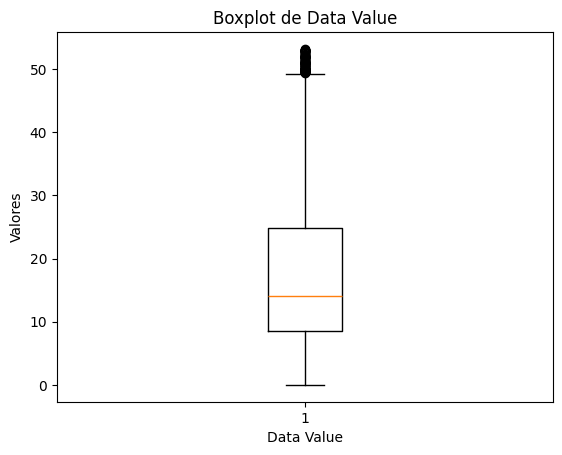

In [8]:
plt.boxplot(aire['Data Value'])
plt.title('Boxplot de Data Value')
plt.xlabel('Data Value')
plt.ylabel('Valores')
plt.show()

### Análisis de Variables Categóricas




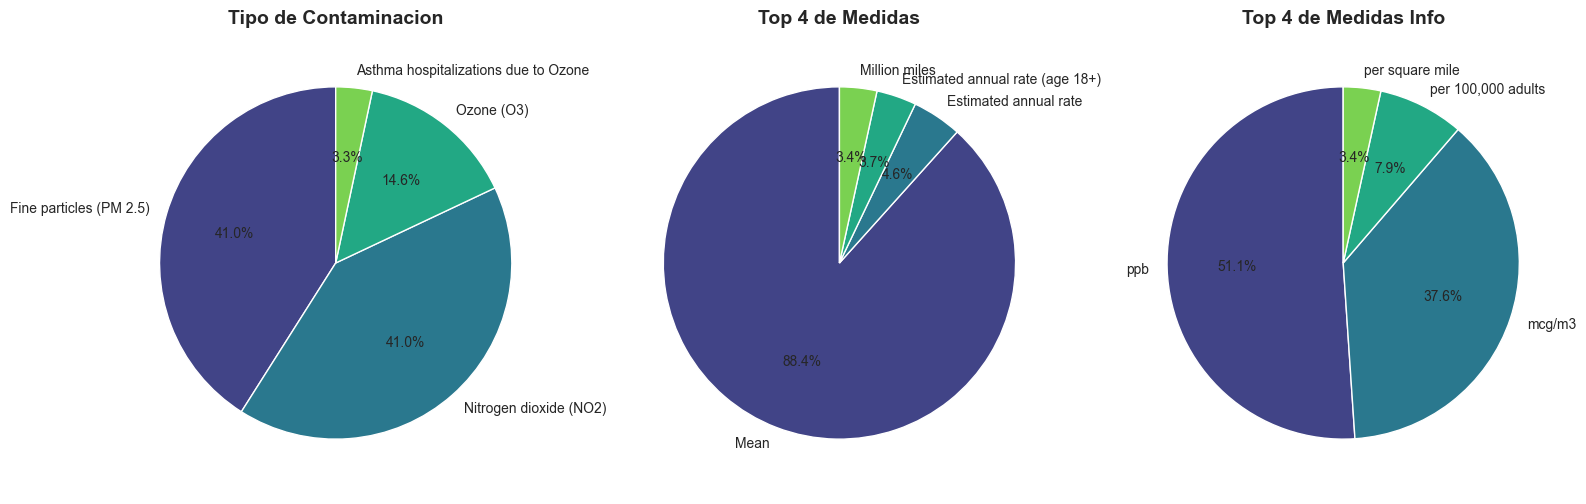

In [9]:
# Establecemos el estilo de gráfico
sns.set_style("whitegrid")

# Contamos las frecuencias de las categorías más comunes para cada columna
top_name = aire['Name'].value_counts().head(4)
top_measure = aire['Measure'].value_counts().head(4)
top_measure_info = aire['Measure Info'].value_counts().head(4)

# Crear la figura con 3 subgráficos (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Cambiar el tamaño según tus necesidades

# Primer gráfico: Tipo de Contaminación (Name)
axes[0].pie(top_name, labels=top_name.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(top_name)))
axes[0].set_title("Tipo de Contaminacion", fontsize=14, fontweight='bold')
axes[0].axis('equal')  # Para asegurar que la torta sea circular

# Segundo gráfico: Top 4 de Medidas (Measure)
axes[1].pie(top_measure, labels=top_measure.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(top_measure)))
axes[1].set_title("Top 4 de Medidas", fontsize=14, fontweight='bold')
axes[1].axis('equal')  # Para asegurar que la torta sea circular

# Tercer gráfico: Top 4 de Medidas (Measure Info)
axes[2].pie(top_measure_info, labels=top_measure_info.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(top_measure_info)))
axes[2].set_title("Top 4 de Medidas Info", fontsize=14, fontweight='bold')
axes[2].axis('equal')  # Para asegurar que la torta sea circular

# Ajustar el espacio entre los subgráficos
plt.subplots_adjust(wspace=0.3)

# Mostrar gráfico
plt.show()

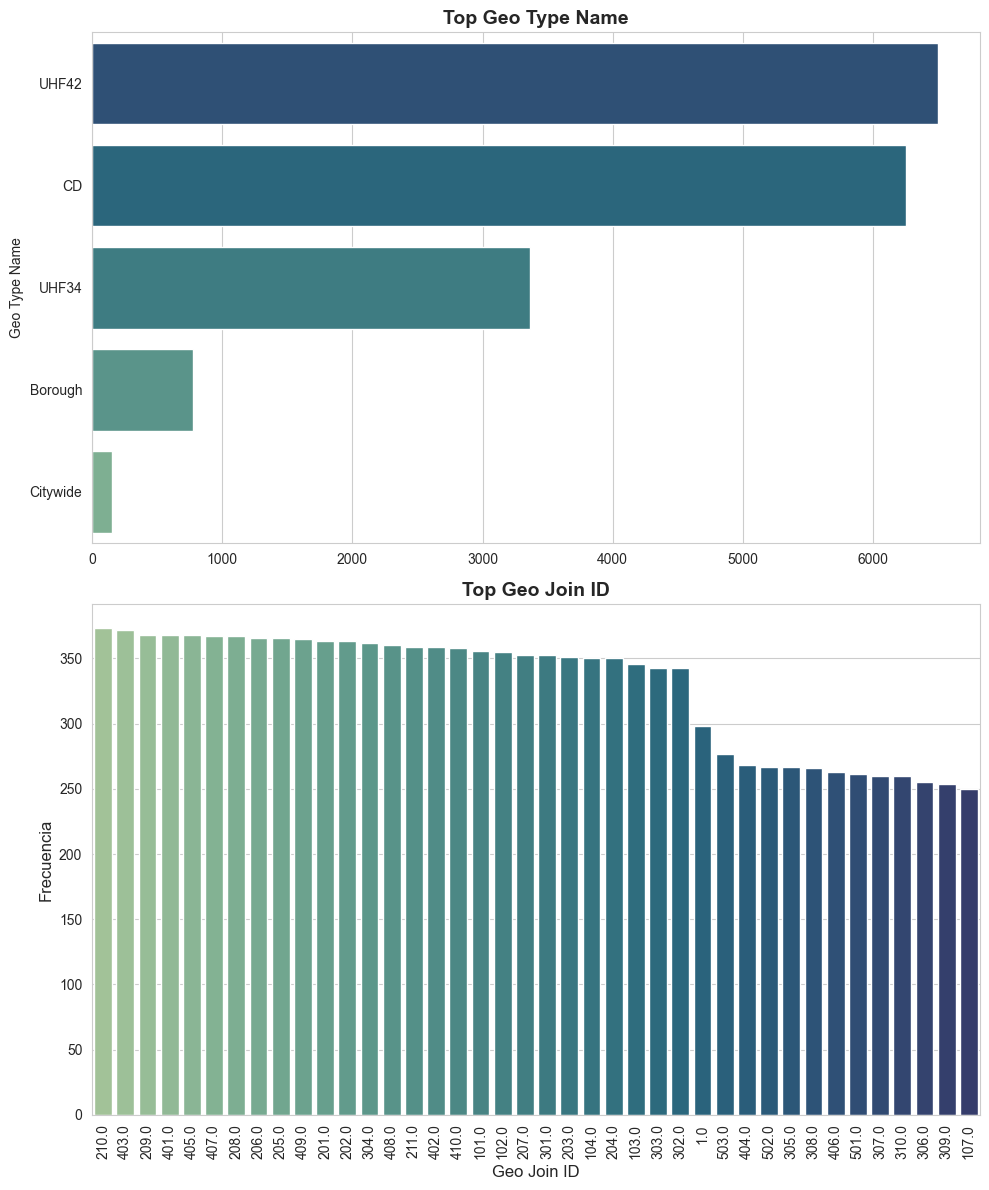

In [10]:
# Crear una figura con 2 subgráficos (2 filas, 1 columna)
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # Ajusta el tamaño de la figura

# Primer gráfico: Top Geo Type Name (horizontal)
top_geo_type = aire['Geo Type Name'].value_counts().sort_values(ascending=True)  # Aseguramos que esté en orden descendente
sns.barplot(x=top_geo_type.values, y=top_geo_type.index, palette='crest', orient='h', ax=axes[0])

axes[0].invert_yaxis()  # Para que el top esté en la parte superior
axes[0].set_title('Top Geo Type Name', fontsize=14, fontweight='bold')

# Segundo gráfico: Top Geo Join ID (vertical)
top_geo_join = aire['Geo Join ID'].value_counts().head(40).sort_values(ascending=False)  # Aseguramos que esté en orden ascendente
sns.barplot(x=top_geo_join.index, y=top_geo_join.values, palette='crest', ax=axes[1])

axes[1].set_title('Top Geo Join ID', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Geo Join ID', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)

# Rotar las etiquetas del eje X para mayor legibilidad
axes[1].tick_params(axis='x', rotation=90)

# Ajuste para que los gráficos no se solapen
plt.tight_layout()

# Mostrar la figura con ambos gráficos
plt.show()

### Análisis de Multivariables

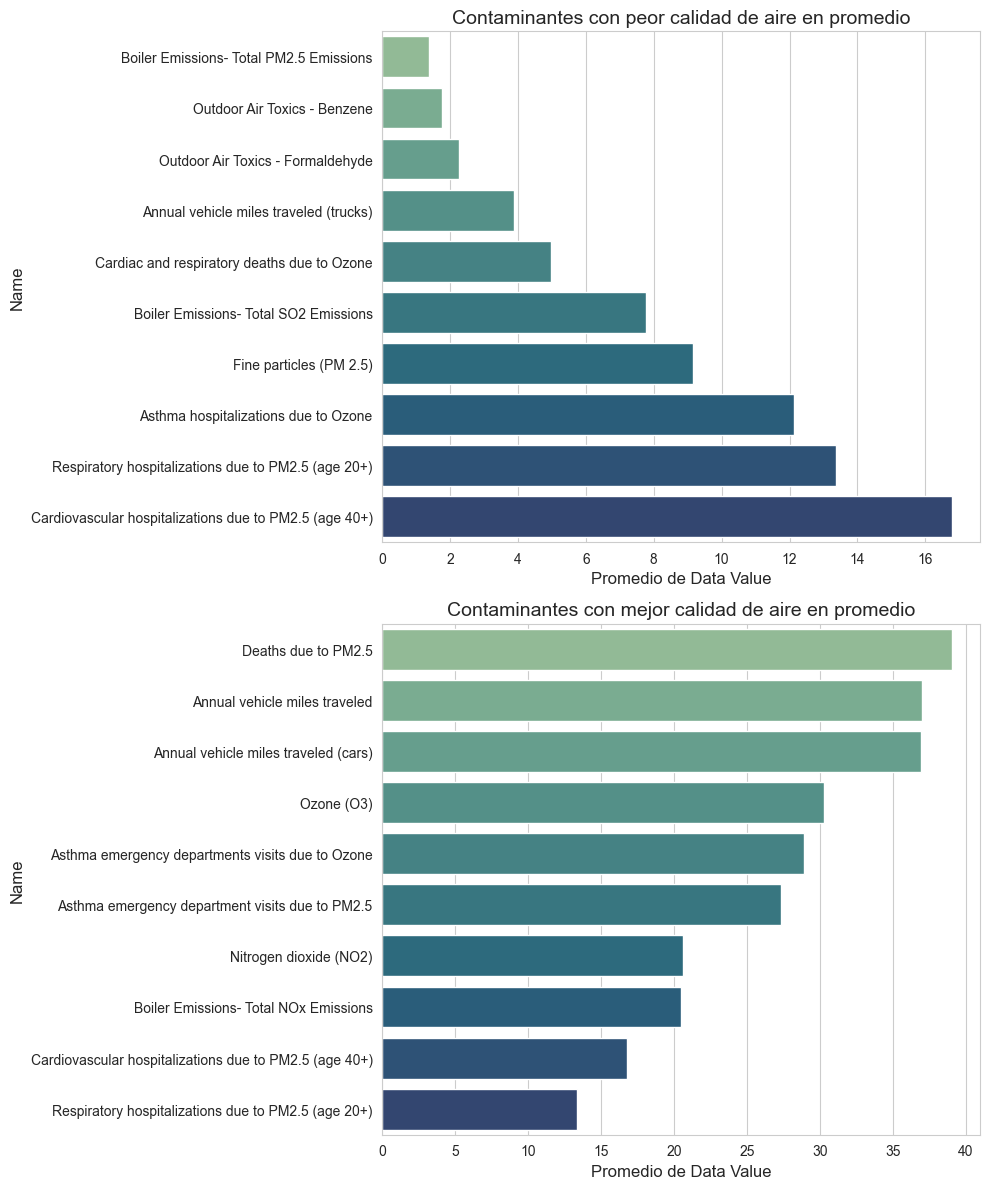

In [11]:
# Crear una figura con 2 subgráficos (2 filas, 1 columna)
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # Ajusta el tamaño de la figura

# Primer gráfico: Contaminantes con peor calidad de aire en promedio (esto será el primer gráfico)
top_10_names_worst = aire.groupby("Name")["Data Value"].mean().sort_values(ascending=True).head(10)
sns.barplot(x=top_10_names_worst.values, y=top_10_names_worst.index, palette="crest", ax=axes[0])

axes[0].set_title("Contaminantes con peor calidad de aire en promedio", fontsize=14)
axes[0].set_xlabel("Promedio de Data Value", fontsize=12)
axes[0].set_ylabel("Name", fontsize=12)

# Segundo gráfico: Contaminantes con mejor calidad de aire en promedio (esto será el segundo gráfico)
top_10_names_best = aire.groupby("Name")["Data Value"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_10_names_best.values, y=top_10_names_best.index, palette="crest", ax=axes[1])

axes[1].set_title("Contaminantes con mejor calidad de aire en promedio", fontsize=14)
axes[1].set_xlabel("Promedio de Data Value", fontsize=12)
axes[1].set_ylabel("Name", fontsize=12)

# Ajuste para que los gráficos no se solapen
plt.tight_layout()

# Mostrar la figura con ambos gráficos
plt.show()

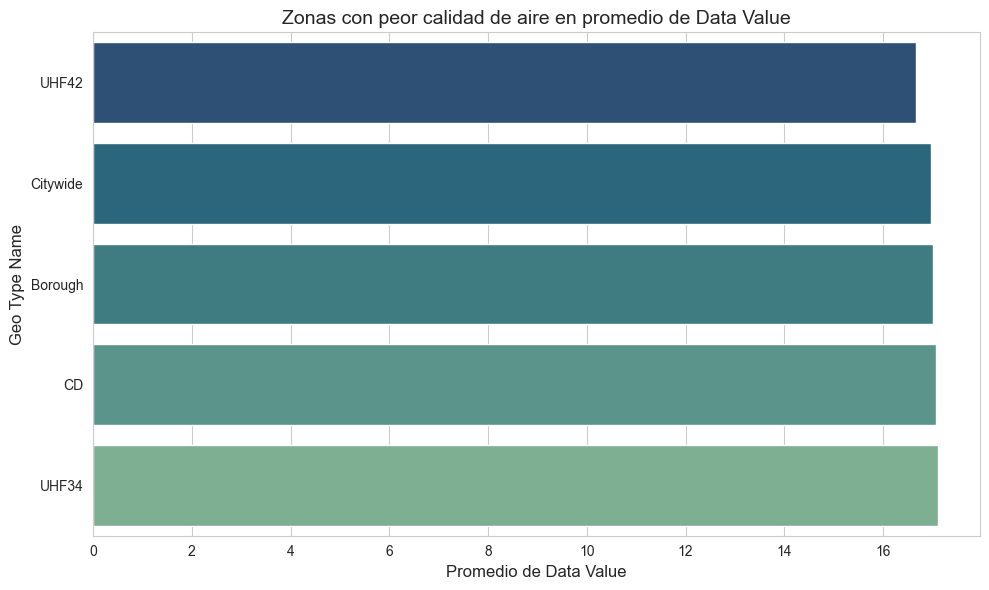

In [12]:
# Crear el gráfico para los contaminantes con peor calidad de aire en promedio
top_10_names_worst = aire.groupby("Geo Type Name")["Data Value"].mean().sort_values(ascending=False)

# Crear la figura y el gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(10, 6))  # Ajusta el tamaño de la figura según sea necesario
sns.barplot(x=top_10_names_worst.values, y=top_10_names_worst.index, palette="crest", ax=ax)

# Ajuste de título y etiquetas
ax.set_title("Zonas con peor calidad de aire en promedio de Data Value", fontsize=14)
ax.set_xlabel("Promedio de Data Value", fontsize=12)
ax.set_ylabel("Geo Type Name", fontsize=12)

# Invertir el eje Y para que el top esté en la parte superior
ax.invert_yaxis()

# Ajuste para evitar que el gráfico se solape
plt.tight_layout()

# Mostrar el gráfico
plt.show()

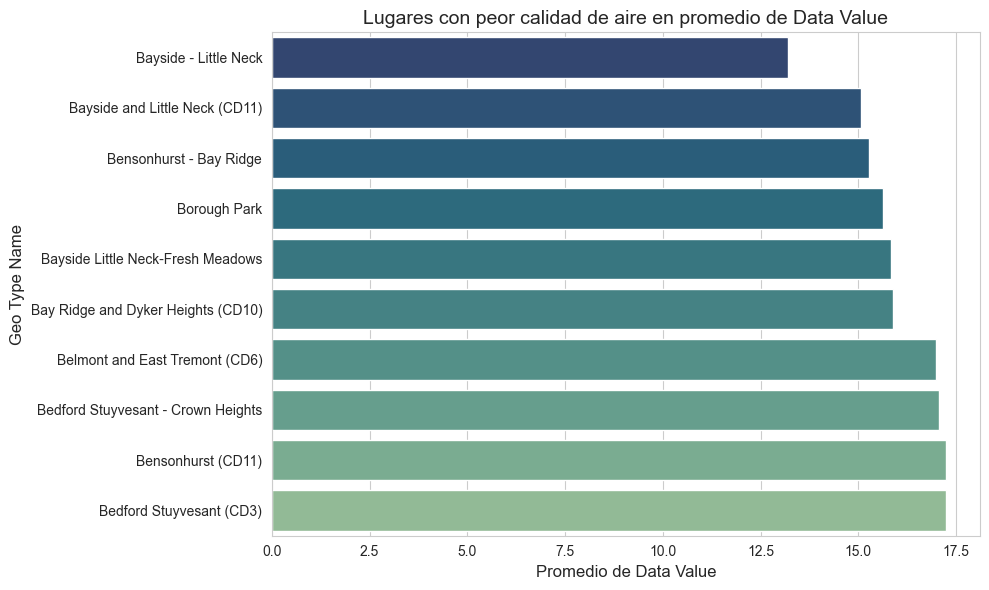

In [13]:
# Crear el gráfico para los contaminantes con peor calidad de aire en promedio
top_10_names_worst = aire.groupby("Geo Place Name")["Data Value"].mean().head(10).sort_values(ascending=False)

# Crear la figura y el gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(10, 6))  # Ajusta el tamaño de la figura según sea necesario
sns.barplot(x=top_10_names_worst.values, y=top_10_names_worst.index, palette="crest", ax=ax)

# Ajuste de título y etiquetas
ax.set_title("Lugares con peor calidad de aire en promedio de Data Value", fontsize=14)
ax.set_xlabel("Promedio de Data Value", fontsize=12)
ax.set_ylabel("Geo Type Name", fontsize=12)

# Invertir el eje Y para que el top esté en la parte superior
ax.invert_yaxis()

# Ajuste para evitar que el gráfico se solape
plt.tight_layout()

# Mostrar el gráfico
plt.show()

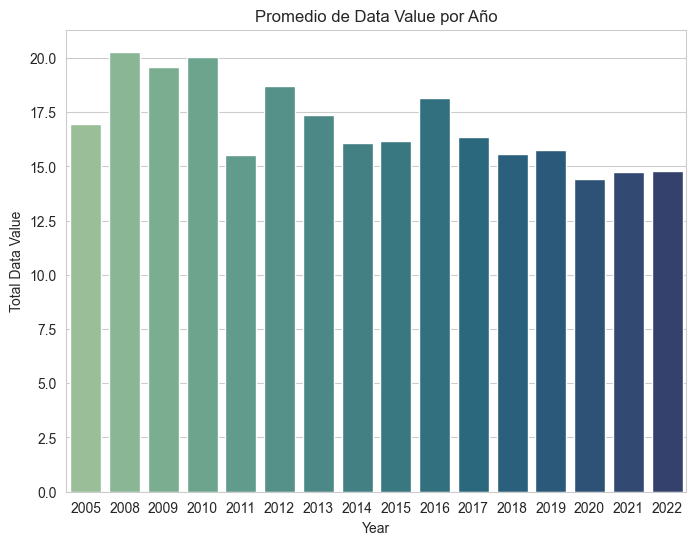

In [14]:
# Agrupar por 'year' y sacar el promedio los valores de 'Data Value'
aire_group = aire.groupby('year')['Data Value'].mean().reset_index()

# Establecer la paleta de colores 'crest' de seaborn


# Crear gráfico de barras (barplot)
plt.figure(figsize=(8, 6))
sns.barplot(x='year', y='Data Value', data=aire_group, palette='crest')

# Añadir etiquetas y título
plt.xlabel('Year')
plt.ylabel('Total Data Value')
plt.title('Promedio de Data Value por Año')

# Mostrar el gráfico
plt.show()

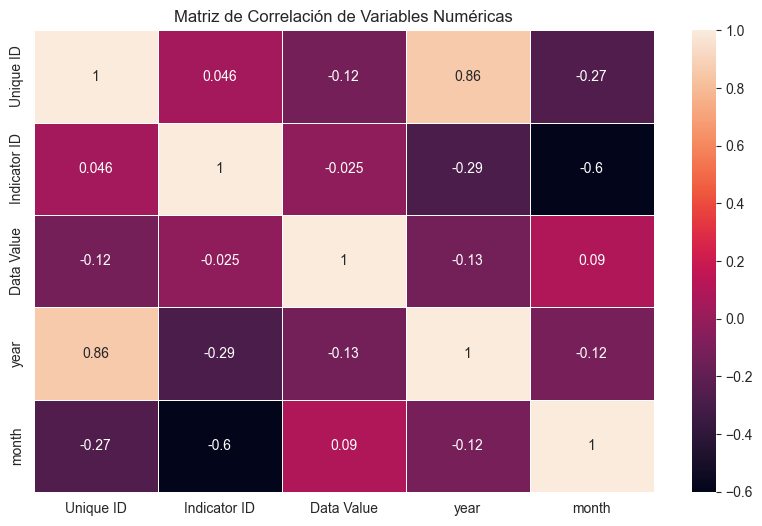

In [15]:
# Filtrar solo las columnas numéricas
aire_numeric = aire.select_dtypes(include=['number'])
# Verificar si alguna columna tiene todos los valores NaN y eliminarla
aire_numeric = aire_numeric.dropna(axis=1, how='all')
# Calcular la matriz de correlación
correlation_matrix = aire_numeric.corr()
# Crear un heatmap para visualizar la correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

## Contaminación Sonora


In [16]:
noise= pd.read_csv('../clean_data/noise_pollution_clean.csv')

### Comprobamos Nulos

In [17]:
noise.isnull().sum()

borough                     0
block                       0
latitude                    0
longitude                   0
year                        0
month                       0
week                        0
day                         0
hour                        0
small-engine                0
medium-engine               0
large-engine                0
engine-of-uncertain-size    0
engine                      0
dtype: int64

### Comprobamos Duplicados

In [18]:
noise[noise.duplicated(keep=False)]

,borough,block,latitude,longitude,year,month,week,day,hour,small-engine,medium-engine,large-engine,engine-of-uncertain-size,engine
0,Manhattan,547,40.72951,-73.99388,2019,10,43,4,8,No se etiqueto,No se etiqueto,No se etiqueto,No se etiqueto,No se etiqueto
2,Manhattan,547,40.72951,-73.99388,2019,10,43,4,8,No está presente,Si está presente,No está presente,No está presente,Si está presente
3,Manhattan,547,40.72951,-73.99388,2019,10,43,4,8,No se etiqueto,No se etiqueto,No se etiqueto,No se etiqueto,No se etiqueto
4,Manhattan,547,40.72951,-73.99388,2019,10,43,4,8,No está presente,Si está presente,Si está presente,No está presente,Si está presente
5,Manhattan,547,40.72951,-73.99388,2019,10,43,4,8,No está presente,Si está presente,Si está presente,No está presente,Si está presente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62016,Manhattan,559,40.73365,-73.98879,2018,10,42,5,19,No está presente,No está presente,No está presente,No está presente,No está presente
62017,Manhattan,559,40.73365,-73.98879,2018,10,42,5,19,No está presente,No está presente,No está presente,No está presente,No está presente
62018,Manhattan,559,40.73365,-73.98879,2018,10,42,5,19,No está presente,No está presente,No está presente,No está presente,No está presente
62019,Manhattan,559,40.73365,-73.98879,2018,8,34,2,9,No está presente,No está presente,No está presente,No está presente,No está presente


In [19]:
noise.describe()

,block,latitude,longitude,year,month,week,day,hour
count,62022.000000,62022.00000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000,62022.000000
mean,593.343878,40.73031,-73.993044,2017.591000,6.411548,26.274838,2.907259,12.417578
std,251.373182,0.01348,0.010074,0.778948,3.710906,16.169650,1.925728,5.824993
min,75.000000,40.67517,-74.015760,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,535.000000,40.72898,-73.996820,2017.000000,3.000000,12.000000,1.000000,8.000000
50%,547.000000,40.73033,-73.995000,2017.000000,7.000000,27.000000,3.000000,12.000000
75%,550.000000,40.73142,-73.992860,2018.000000,10.000000,41.000000,4.000000,17.000000
max,2613.000000,40.77991,-73.851840,2019.000000,12.000000,52.000000,6.000000,23.000000


In [20]:
noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62022 entries, 0 to 62021
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   borough                   62022 non-null  object 
 1   block                     62022 non-null  int64  
 2   latitude                  62022 non-null  float64
 3   longitude                 62022 non-null  float64
 4   year                      62022 non-null  int64  
 5   month                     62022 non-null  int64  
 6   week                      62022 non-null  int64  
 7   day                       62022 non-null  int64  
 8   hour                      62022 non-null  int64  
 9   small-engine              62022 non-null  object 
 10  medium-engine             62022 non-null  object 
 11  large-engine              62022 non-null  object 
 12  engine-of-uncertain-size  62022 non-null  object 
 13  engine                    62022 non-null  object 
dtypes: flo

### Análisis de Variables Categóricas

### Precencia de Motores


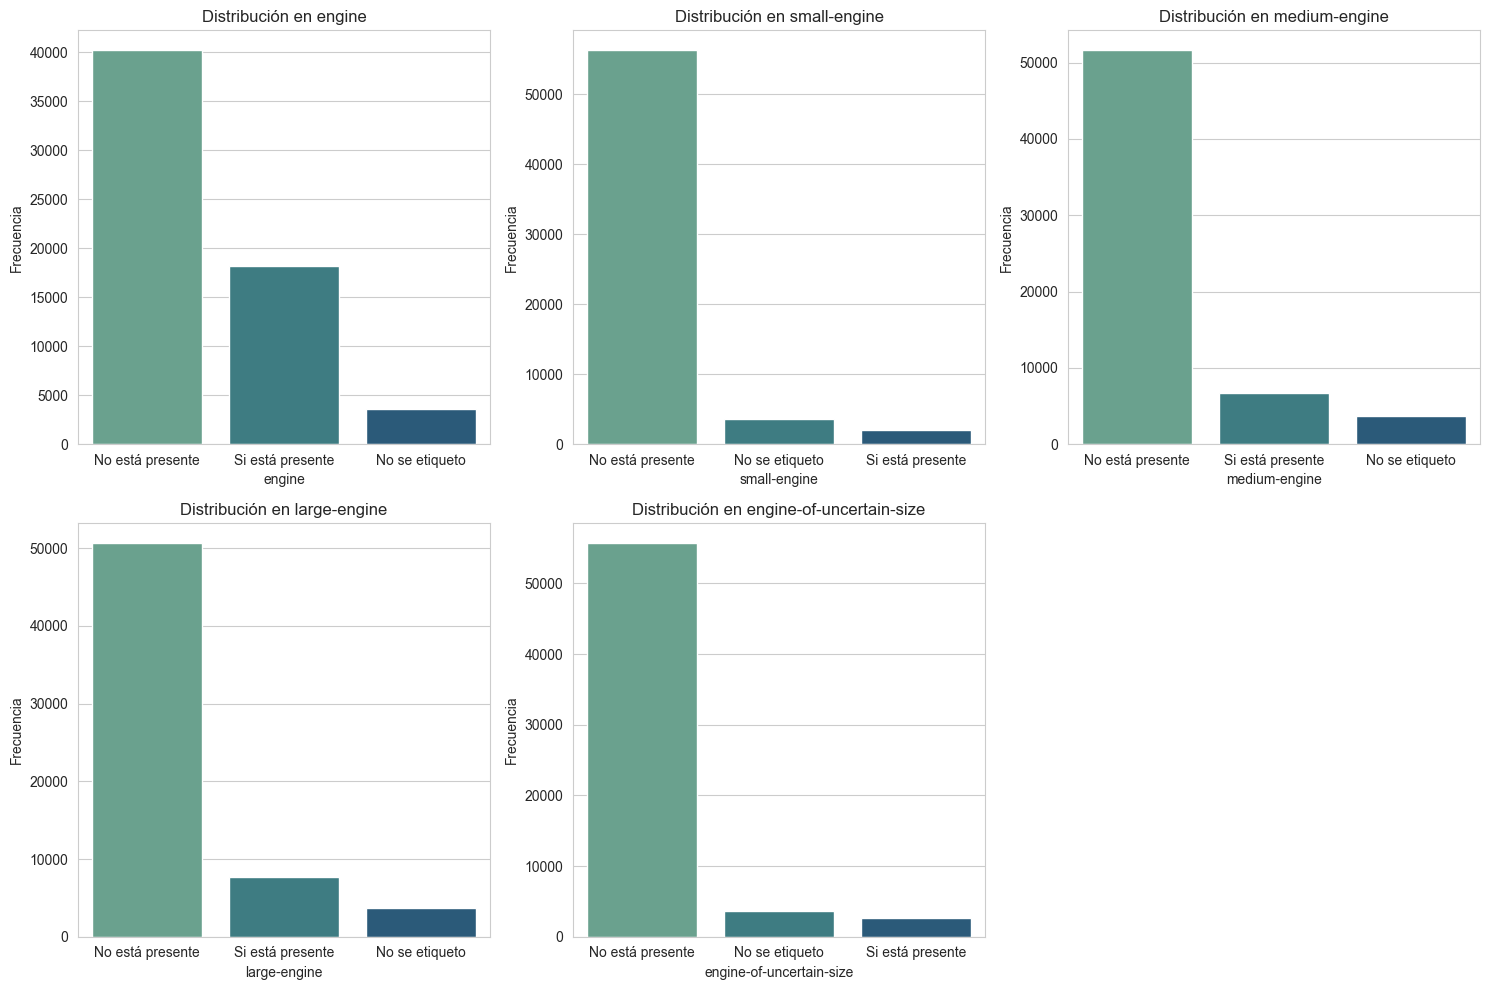

In [21]:
columnas = [
    'engine',
    'small-engine',
    'medium-engine',
    'large-engine',
    'engine-of-uncertain-size'
]

# Establecer el tamaño de la figura para que los gráficos no se solapen
plt.figure(figsize=(15, 10))

# Iterar sobre las columnas para generar un gráfico para cada una
for i, columna in enumerate(columnas, 1):
    # Calcular las frecuencias de los valores de la columna
    frequency = noise[columna].value_counts().reset_index()
    frequency.columns = [columna, 'count']

    # Crear un subplot para cada gráfico
    plt.subplot(2, 3, i)
    
    # Graficar las frecuencias
    sns.barplot(x=columna, y='count', data=frequency, palette='crest')

    # Títulos y etiquetas
    plt.title(f'Distribución en {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

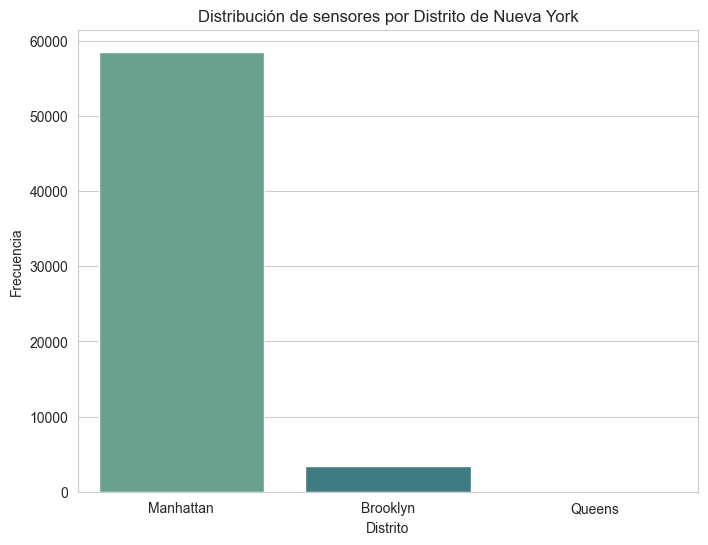

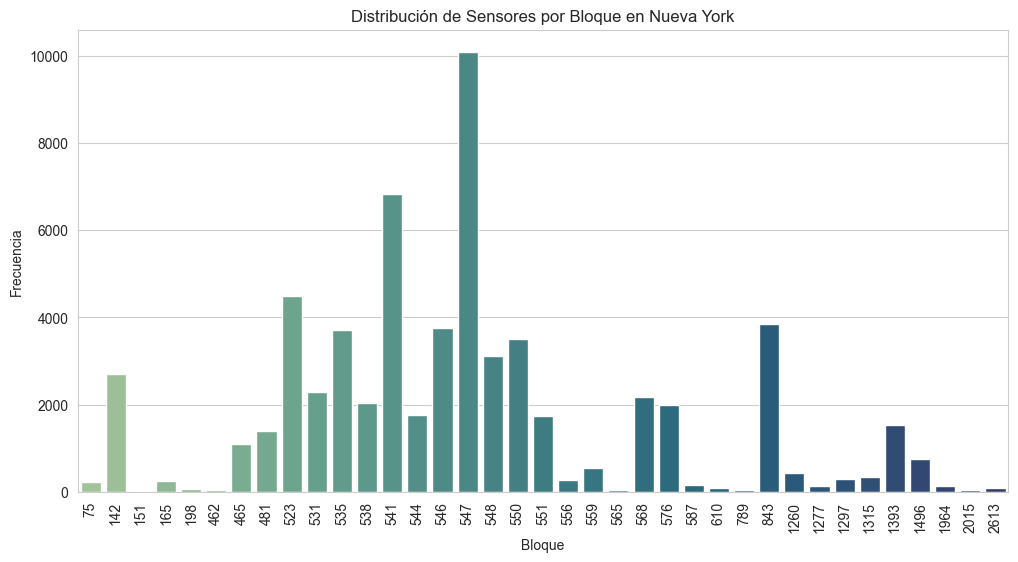

In [22]:
borough_counts = noise['borough'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=borough_counts.index, y=borough_counts.values, palette='crest')  
plt.title('Distribución de sensores por Distrito de Nueva York')
plt.xlabel('Distrito')
plt.ylabel('Frecuencia')
plt.show()

# Contar las ocurrencias de cada valor en la columna 'block'
block_counts = noise['block'].value_counts()

# Graficar la distribución de la columna 'block' usando un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=block_counts.index, y=block_counts.values, palette='crest')  # Puedes cambiar la paleta de colores
plt.title('Distribución de Sensores por Bloque en Nueva York')
plt.xlabel('Bloque')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si son muchas
plt.show()

### Análisis de Variables Numéricas

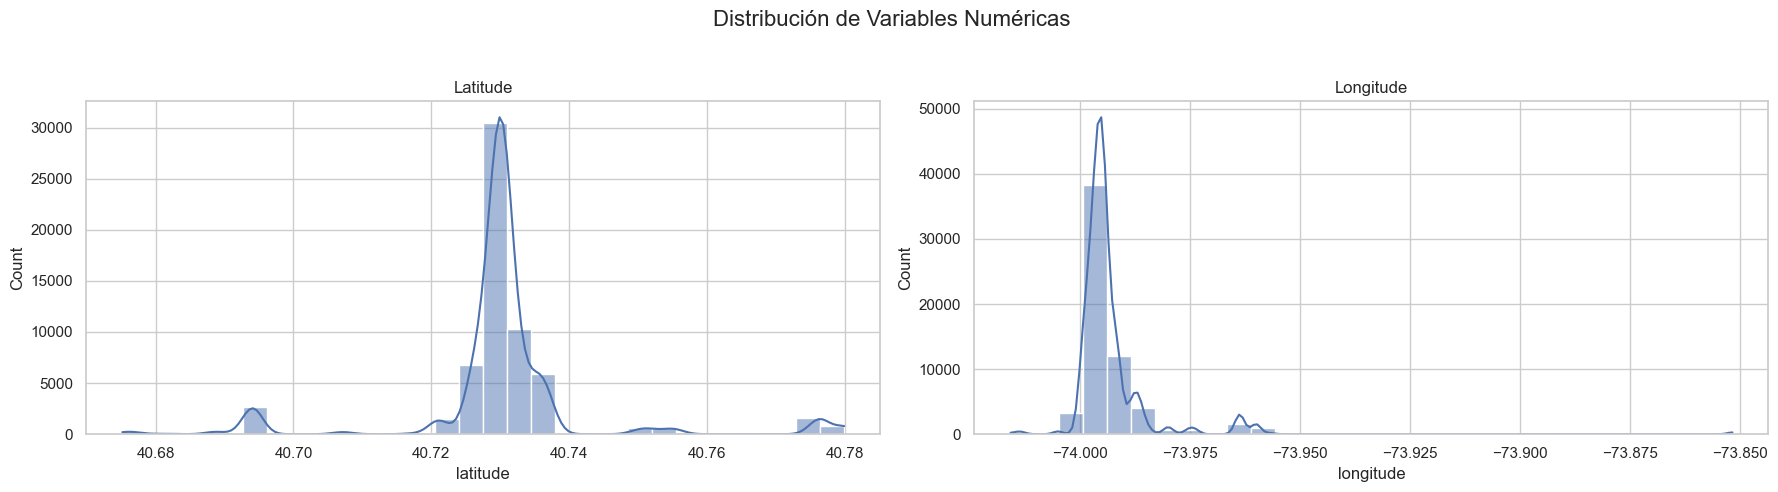

In [24]:
# Configuración de estilo
sns.set(style="whitegrid")

# Crear subgráficos de 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(18, 5))  # Cambiar a 1 fila y 2 columnas
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)

# Gráfico para 'latitude'
sns.histplot(noise['latitude'], bins=30, kde=True, ax=axes[0])  # Cambiar índice a 0
axes[0].set_title('Latitude')

# Gráfico para 'longitude'
sns.histplot(noise['longitude'], bins=30, kde=True, ax=axes[1])  # Cambiar índice a 1
axes[1].set_title('Longitude')

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el espacio entre los gráficos
plt.show()


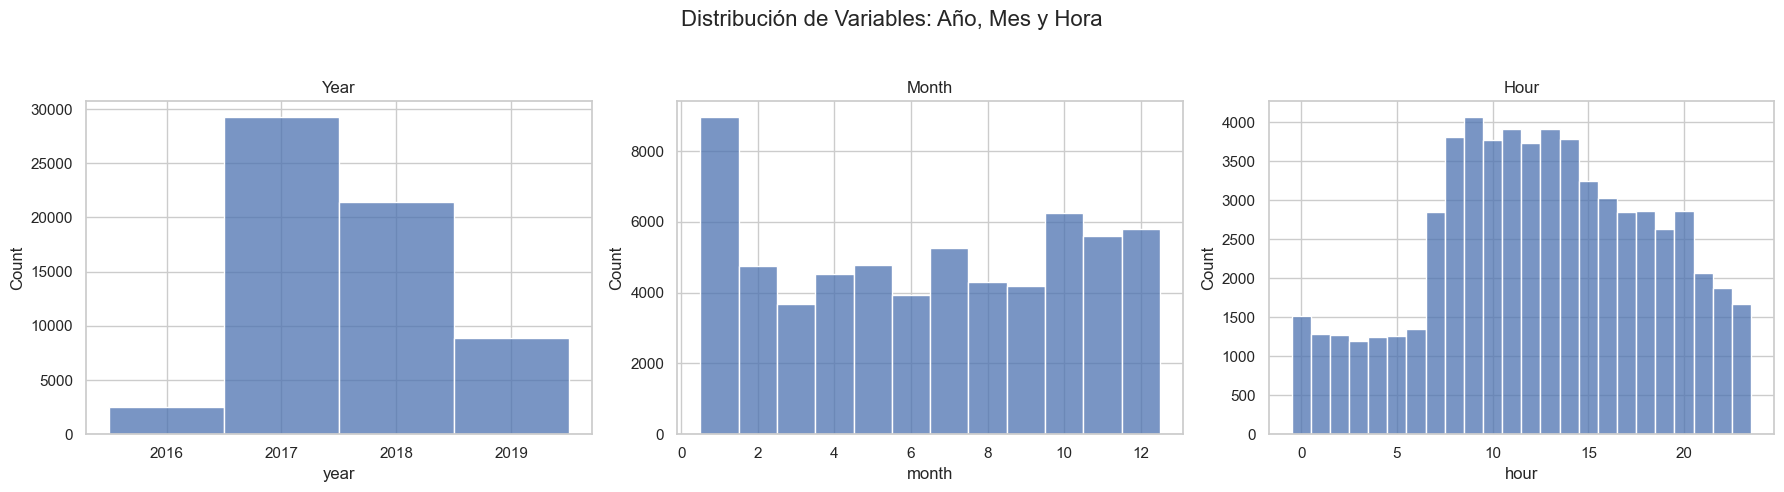

In [25]:
sns.set(style="whitegrid")

# Crear subgráficos de 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribución de Variables: Año, Mes y Hora', fontsize=16)

# Asegúrate de que los valores de 'year' sean enteros
noise['year'] = noise['year'].astype(int)

# Gráfico para 'year'
sns.histplot(noise['year'], discrete=True, ax=axes[0])
axes[0].set_title('Year')
axes[0].set_xticks(sorted(noise['year'].unique()))

# Gráfico para 'month'
sns.histplot(noise['month'], bins=12, discrete=True, ax=axes[1])
axes[1].set_title('Month')

# Gráfico para 'hour'
sns.histplot(noise['hour'], bins=24, discrete=True, ax=axes[2])
axes[2].set_title('Hour')

# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Análisis de Multivariables

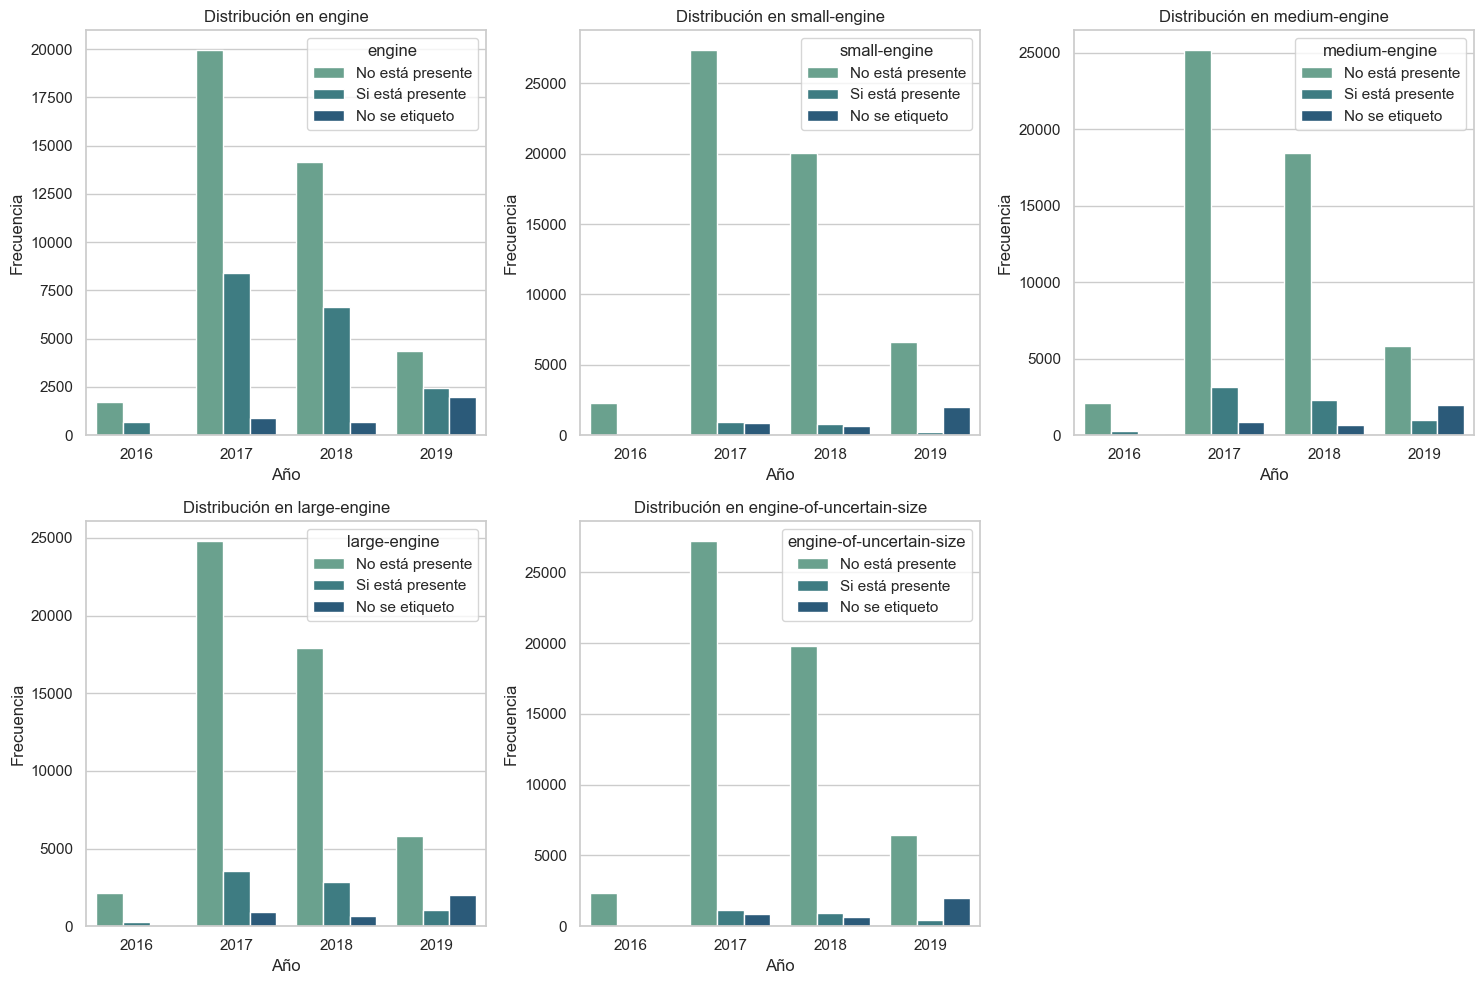

In [26]:
# Establecer el tamaño de la figura para que los gráficos no se solapen
plt.figure(figsize=(15, 10))

# Iterar sobre las columnas para generar un gráfico para cada una
for i, columna in enumerate(columnas, 1):
    # Agrupar por 'year' y calcular las sumas o frecuencias de la columna
    frequency = noise.groupby('year')[columna].value_counts().reset_index(name='count')
    
    # Crear un subplot para cada gráfico
    plt.subplot(2, 3, i)
    
    # Graficar las frecuencias
    sns.barplot(x='year', y='count', hue=columna, data=frequency, palette='crest')

    # Títulos y etiquetas
    plt.title(f'Distribución en {columna}')
    plt.xlabel('Año')
    plt.ylabel('Frecuencia')
    plt.legend(title=columna)

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


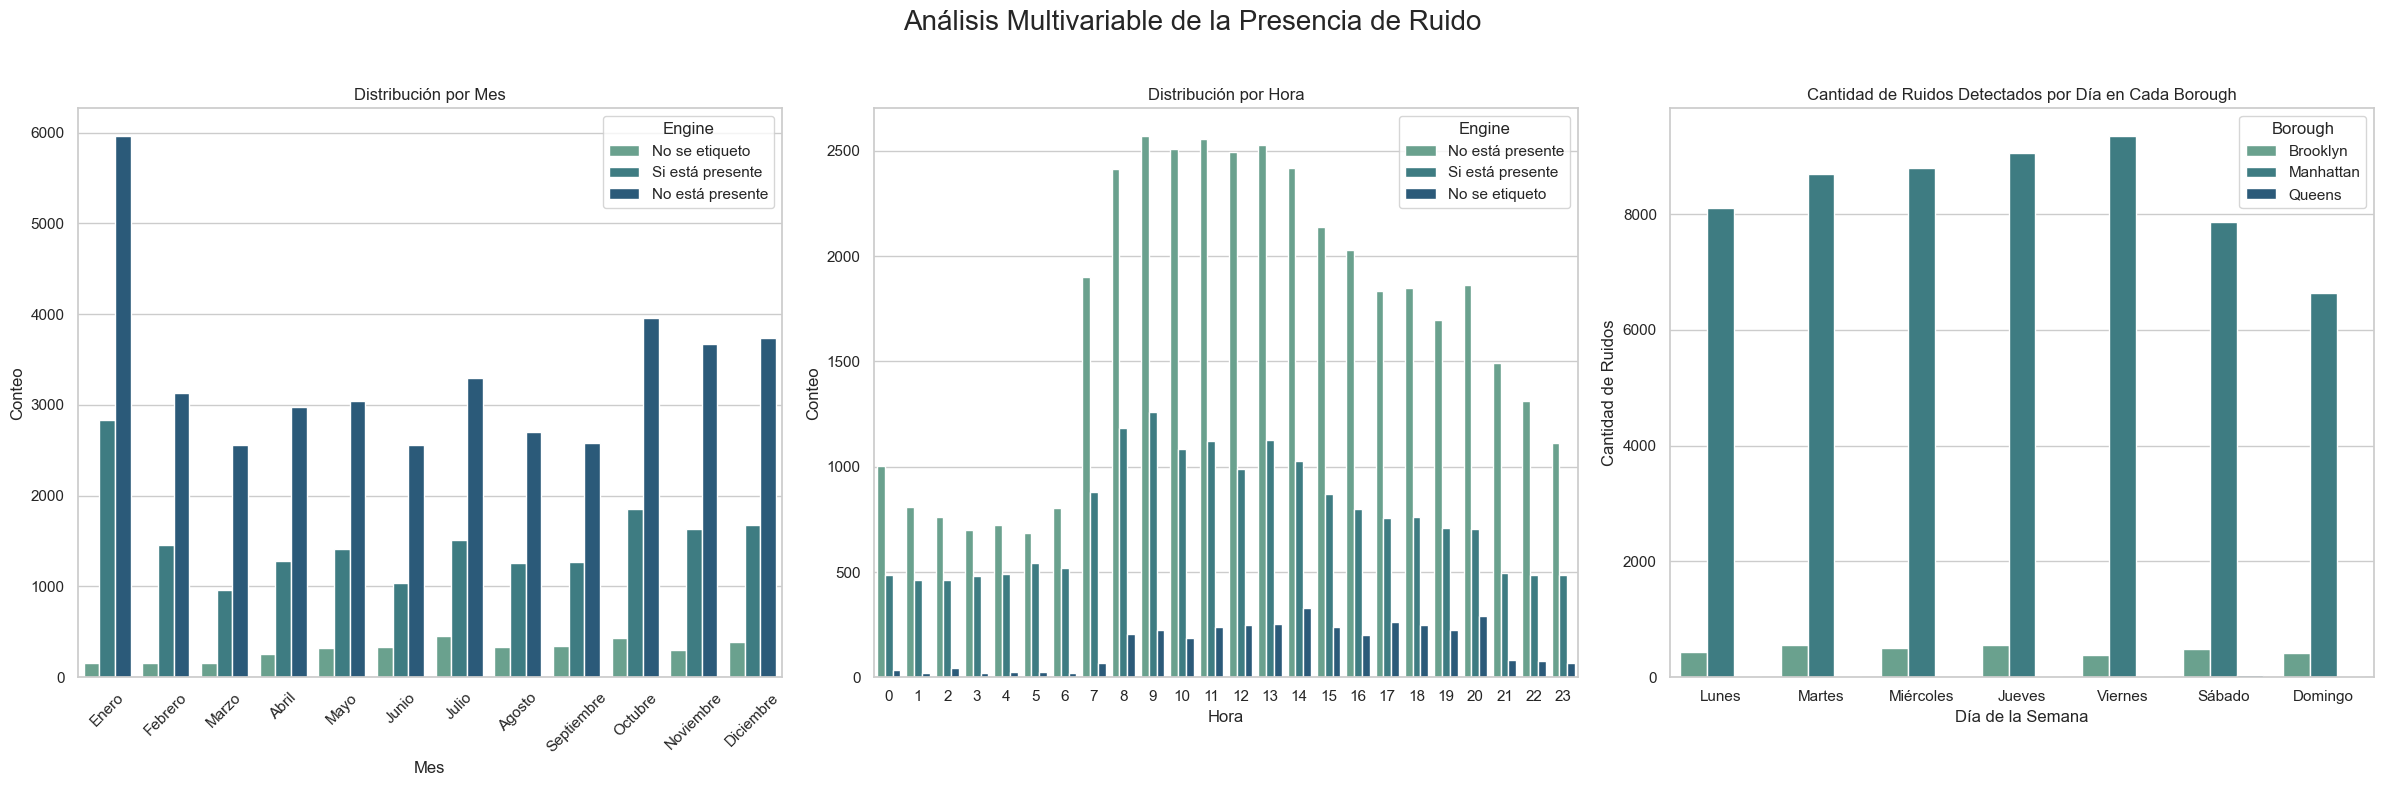

In [27]:
# Mapeo de números a nombres de meses
month_mapping = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
noise['month'] = noise['month'].map(month_mapping)

# Crear un diccionario que mapea los números de días a los nombres de los días
dia = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}
orden = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Reemplazar directamente los valores de 'day' con los nombres de los días
noise['day'] = noise['day'].map(dia)

# Agrupar por 'day' y 'borough' y contar la cantidad de ruidos
noise_by_day_borough = noise.groupby(['day', 'borough']).size().reset_index(name='count')

# Asegurar que los días estén en el orden correcto
noise_by_day_borough['day'] = pd.Categorical(noise_by_day_borough['day'], categories=orden, ordered=True)
noise_by_day_borough = noise_by_day_borough.sort_values('day')

# Configuración de gráficos
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
fig.suptitle('Análisis Multivariable de la Presencia de Ruido', fontsize=20)

# Gráfico de distribución por mes
sns.countplot(x='month', data=noise, hue='engine', palette='crest', ax=axes[0], order=list(month_mapping.values()))
axes[0].set_title('Distribución por Mes')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Conteo')
axes[0].legend(title='Engine')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de distribución por hora
sns.countplot(x='hour', data=noise, hue='engine', palette='crest', ax=axes[1])
axes[1].set_title('Distribución por Hora')
axes[1].set_xlabel('Hora')
axes[1].set_ylabel('Conteo')
axes[1].legend(title='Engine')

# Gráfico de barras por día de la semana y borough
sns.barplot(data=noise_by_day_borough, x='day', y='count', hue='borough', palette='crest', ax=axes[2])
axes[2].set_title('Cantidad de Ruidos Detectados por Día en Cada Borough')
axes[2].set_xlabel('Día de la Semana')
axes[2].set_ylabel('Cantidad de Ruidos')
axes[2].legend(title='Borough')

# Ajustar diseño del gráfico
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

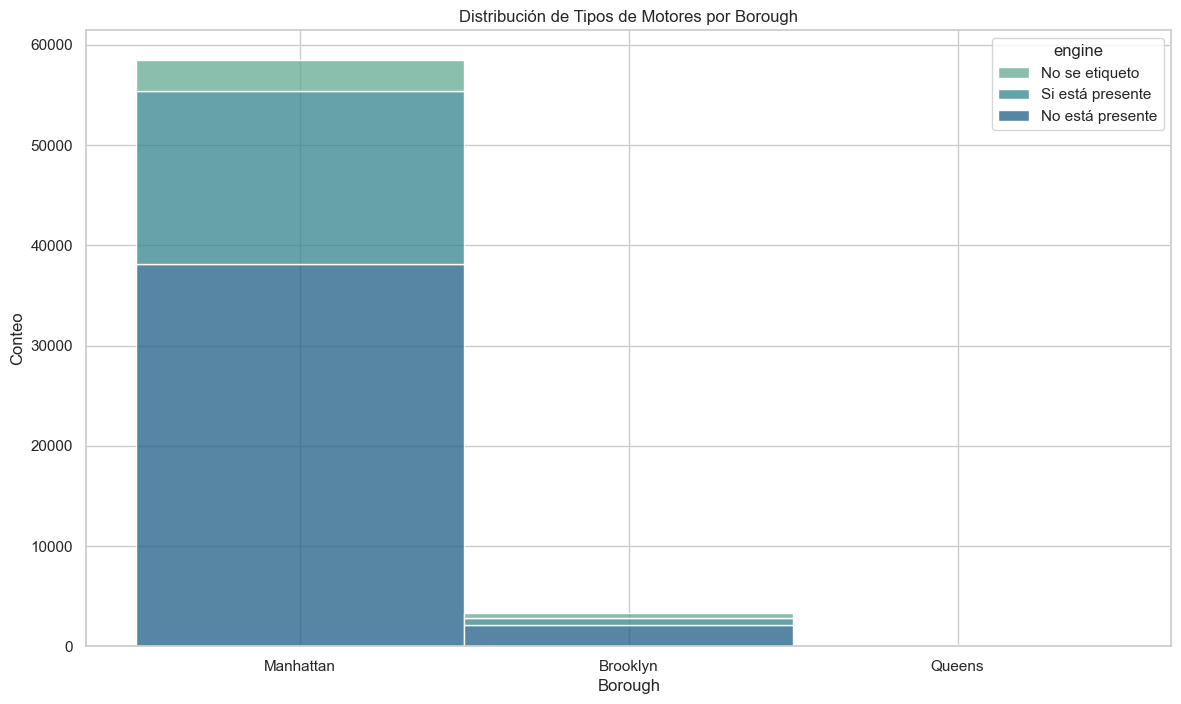

In [28]:
plt.figure(figsize=(14, 8))
sns.histplot(data=noise, x='borough', hue='engine', multiple='stack', palette='crest')
plt.title('Distribución de Tipos de Motores por Borough')
plt.xlabel('Borough')
plt.ylabel('Conteo')
plt.show()


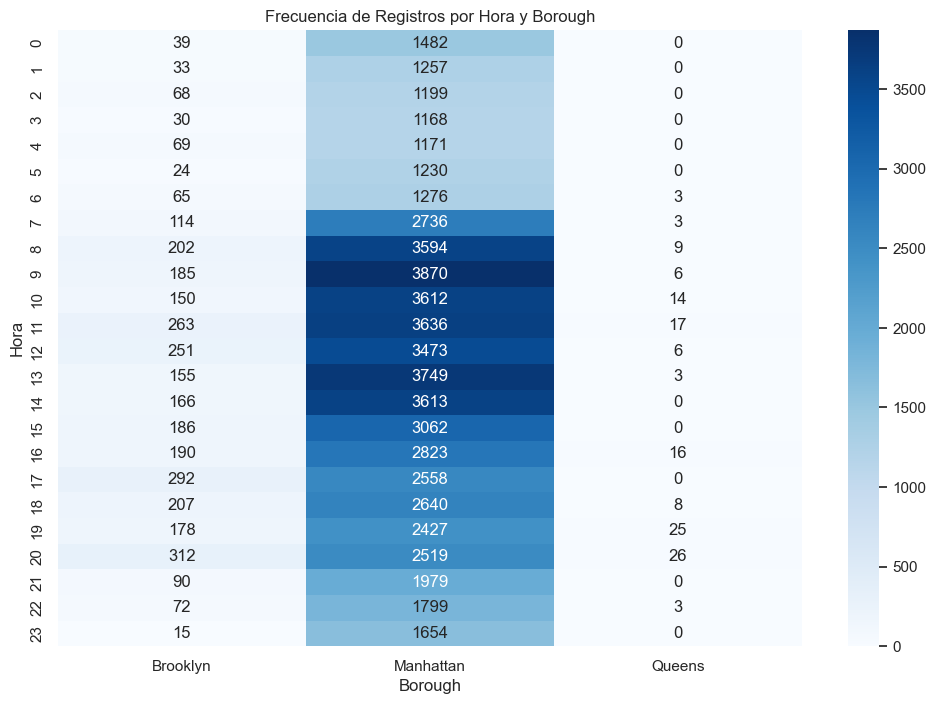

In [29]:
heatmap_data = noise.pivot_table(index='hour', columns='borough', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')
plt.title('Frecuencia de Registros por Hora y Borough')
plt.xlabel('Borough')
plt.ylabel('Hora')
plt.show()

### Matriz de Correlación 

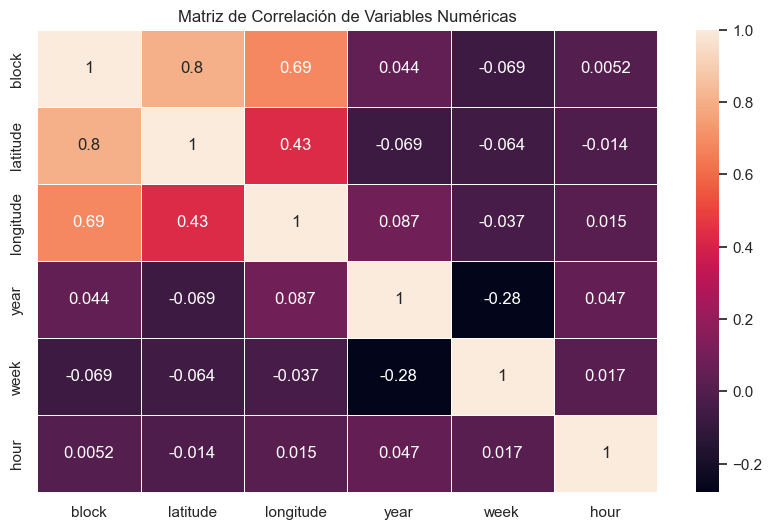

In [30]:
# Filtrar solo las columnas numéricas
noise_numeric = noise.select_dtypes(include=['number'])
# Verificar si alguna columna tiene todos los valores NaN y eliminarla
noise_numeric = noise_numeric.dropna(axis=1, how='all')
# Calcular la matriz de correlación
correlation_matrix = noise_numeric.corr()
# Crear un heatmap para visualizar la correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()